In [1]:
import os
import IPython.display as display
os.getcwd()

'/Users/vanessatang/datasets'

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf

ModuleNotFoundError: No module named 'tree'

In [61]:
ds = tfds.load('covid_cxr')

In [8]:
os.chdir('..')

In [54]:
#to print bytes as in tfrecord
raw_dataset = tf.data.TFRecordDataset('tensorflow_datasets\\covid_cxr\\0.1.0\\covid_cxr-test.tfrecord-00000-of-00008')
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    #print(example)

In [66]:
'''
    To print actual images with label
'''
# to read TFRecord file use TFRecordDataset
raw_image_dataset = tf.data.TFRecordDataset('tensorflow_datasets\\covid_cxr\\0.1.0\\covid_cxr-test.tfrecord-00000-of-00008')

# Create a dictionary describing the features.
image_feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
    "label": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }

# create a function to apply image feature description to each observation
def _parse_image_function(example_proto):
  # parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# use map to apply this operation to each element of dataset
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

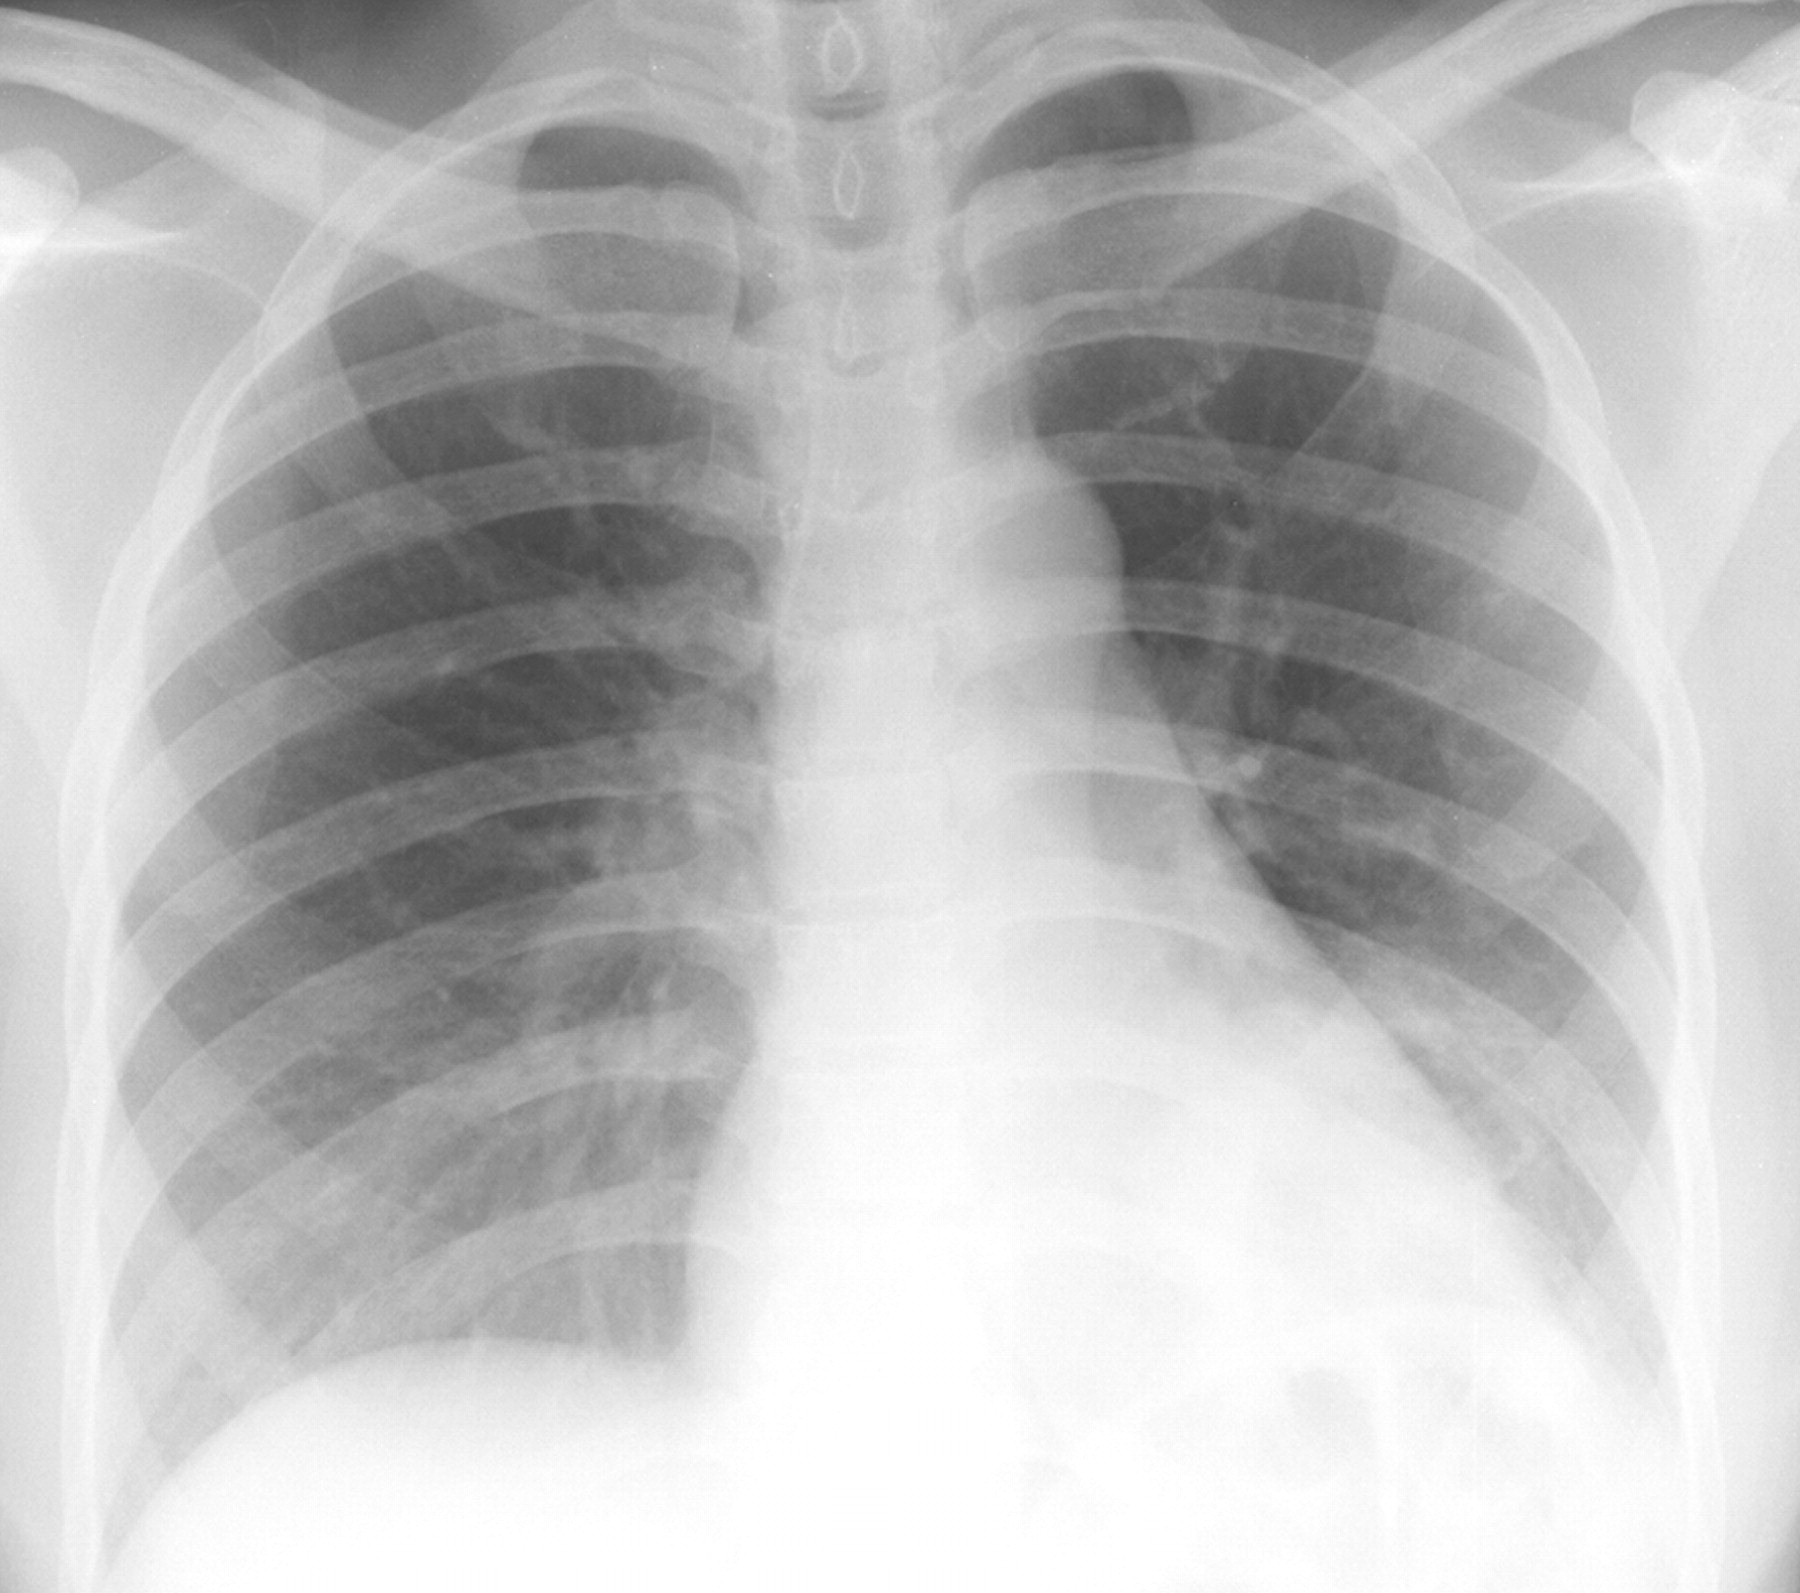

The label of image is 2


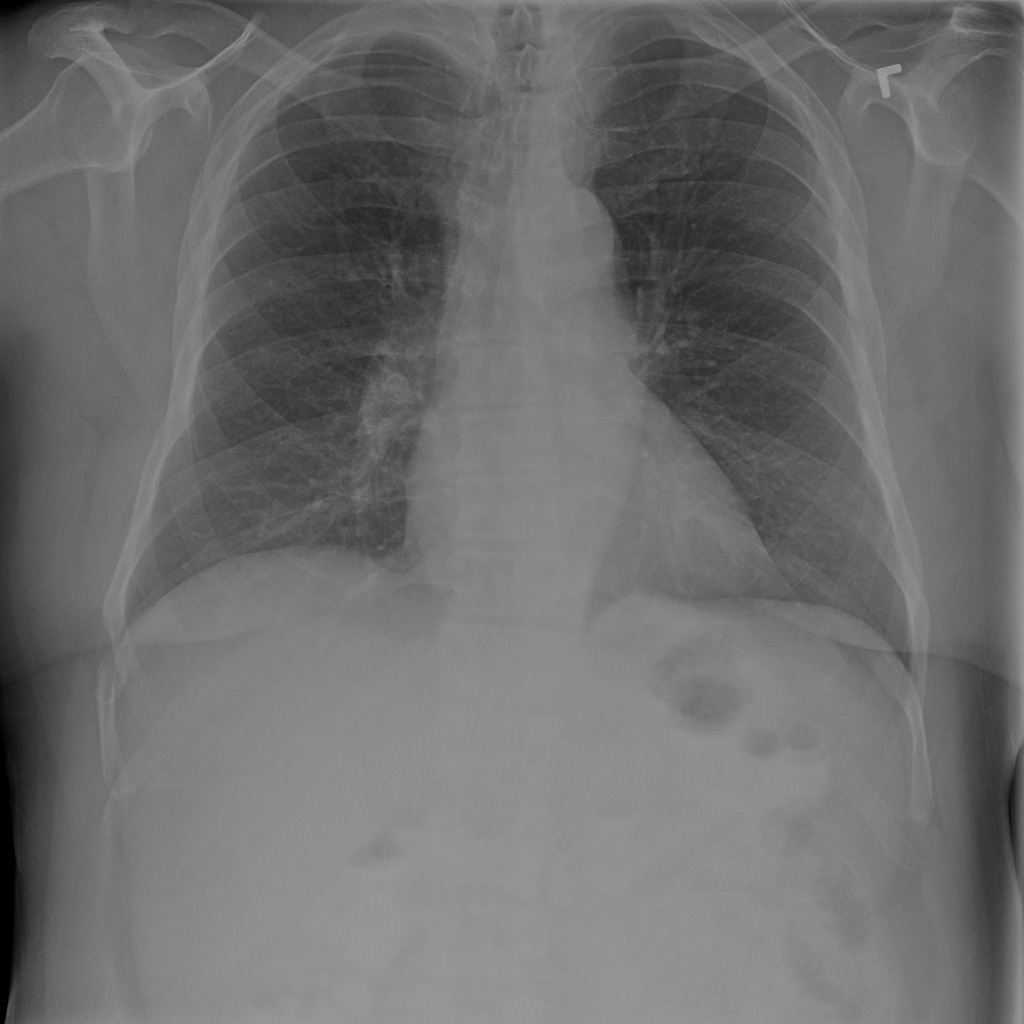

The label of image is 1


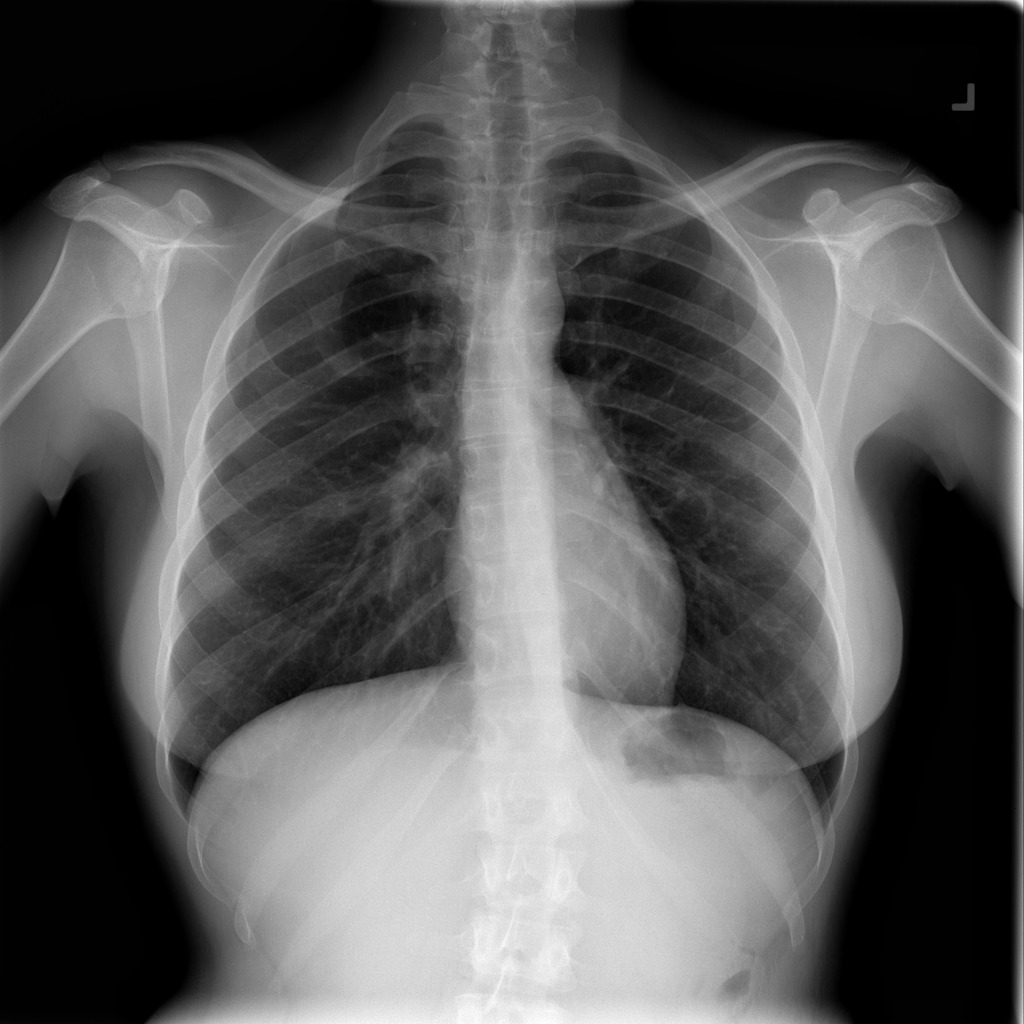

The label of image is 1


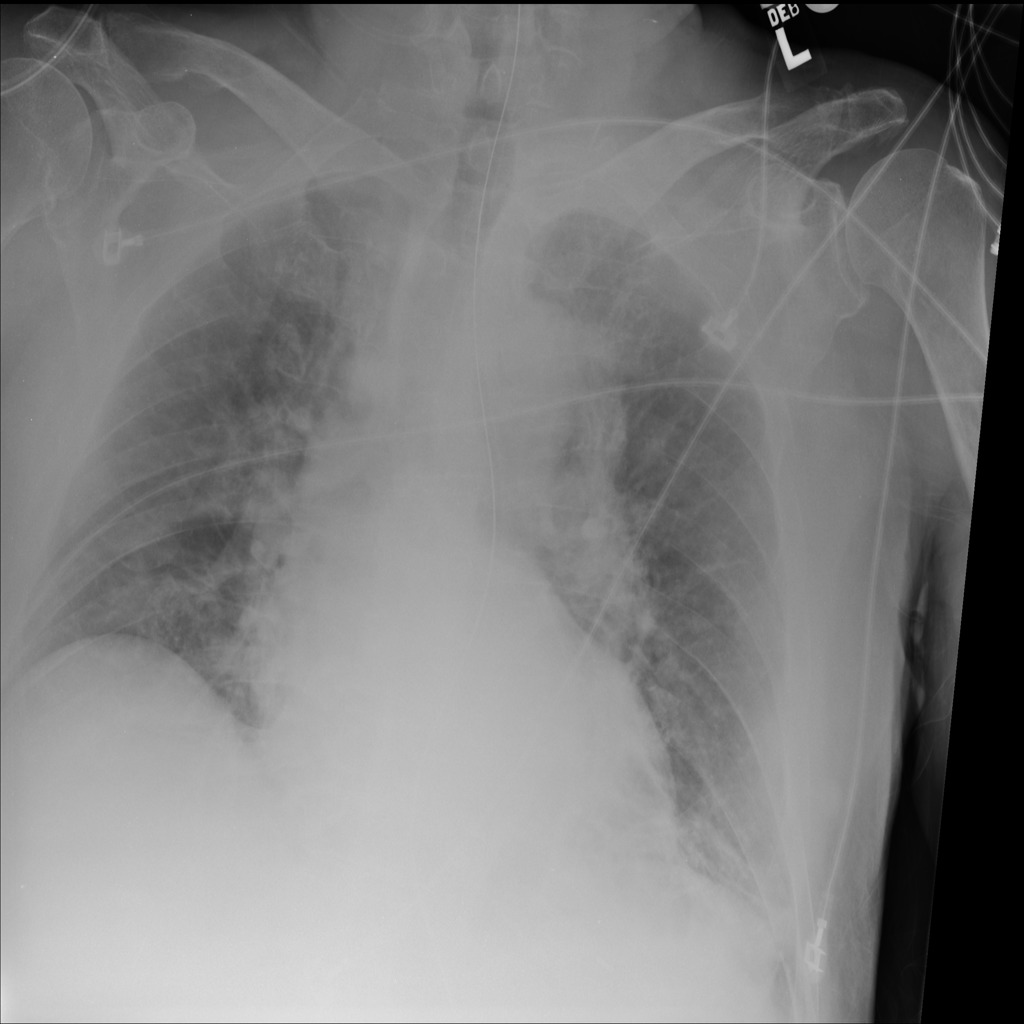

The label of image is 2


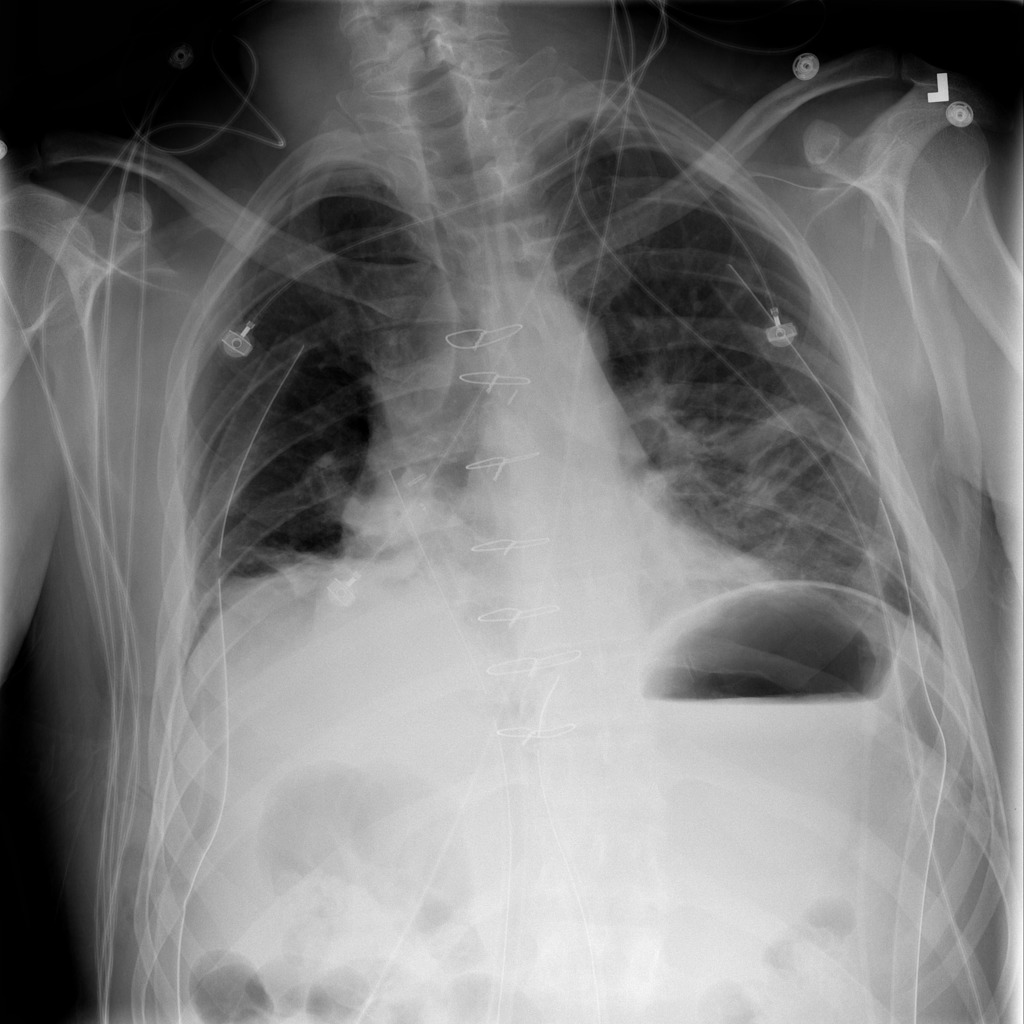

The label of image is 2


In [67]:
for image_features in parsed_image_dataset.take(5):
  image = image_features['image'].numpy()
  display.display(display.Image(data=image))
  label = image_features['label'].numpy()
  print('The label of image is', label)